In [1]:
import copy
import time
import itertools
nums = [i for i in range(1, 10)]

def kSum(nums, k, target):
    def validPath(path):
        s = { }
        for num in path:
            s.setdefault(num, 0)
            s[num] += 1
            #cant be three of same number in orthogonal because it forms y shapes, but the hooks only do L shape
            if s[num] > 2 or s[num] > num:
                return False
        return True
    
    def backtrack(start, k, target, path):
        if k == 0:
            if target == 0:
                if validPath(path):

                    res.add(tuple(sorted(path)))
            return
        if target < 0:
            return
        for i in range(start, len(nums)):
            backtrack(i, k - 1, target - nums[i], path + [nums[i]])

    res = set()
    backtrack(0, k, target, [])
    return res
    
#only need to save the two sum shit
hint_list = [18,7,12,9,31,5,11,22,19,14,15]
ksum_dic = {}
for hint in hint_list:
    if hint not in ksum_dic:
        ksum_dic[hint] = kSum(nums,2,hint)


def fillRow(matrix,row,level):
    for col in range(0,9):
        if matrix[row][col] == 0:
            matrix[row][col] = level
    return copy.deepcopy(matrix)
    
def fillCol(matrix,col,level):
    for row in range(0,9):
        if matrix[row][col] == 0:
            matrix[row][col] = level
    return copy.deepcopy(matrix)
    
def getOrthogonal(matrix,row,col):
    
    orth_list = []
    
    if row-1 >= 0:
        orth_list.append(matrix[row-1][col])
        
    if row+1 < 9:
        orth_list.append(matrix[row+1][col])

    if col-1 >= 0:
        orth_list.append(matrix[row][col-1])

    if col+1 < 9:
        orth_list.append(matrix[row][col+1])
        
    return orth_list

     
nums = [1,2,3,4,5,6,7,8,9]

bucket_count = [2*num-1 for num in nums]

def checkPerm(perm):
    for a,b in  zip (perm, bucket_count):
        if a > b:   
            return False
    return True

perms = [perm for perm in list(itertools.permutations(nums)) if checkPerm(perm) ]



inverse_one = [
    [0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0]

]

def pairInList(k_one,k_two, orth):
    if k_one in orth:
        pos = orth.index(k_one)
        orth[pos] = -1
        if k_two in orth and ((k_one != 1 and k_two != 1 and 1 not in orth) or (k_one == 1 or k_two == 1)):
            return True
    return False


def checkSum(orth,number,perm):
    ksum_orth =  [perm[num-1] for num in orth]
    rem = sum(ksum_orth) - number
    twosum_list = ksum_dic[number]


    if rem == 0 or (rem > 1 and rem in ksum_orth):
        return True

    if 1 not in ksum_orth and number in ksum_orth:
        return True

    for k_one, k_two in twosum_list:
        if pairInList(k_one,k_two, ksum_orth):
            return True
        
    return False
    
def botTwentyTwoCheck(matrix,perm):

    return perm[matrix[4][6]-1] + perm[matrix[5][7]-1] + perm[matrix[4][8]-1] != 22

def pairInList(k_one, k_two, orth):
    if k_one in orth:
        pos = orth.index(k_one)
        orth[pos] = -1
        if k_two in orth and ((k_one != 1 and k_two != 1 and 1 not in orth) or (k_one == 1 or k_two == 1)):
            return True
    return False
    
    
def validateMatrix(matrix):
    pass_test = False
    for perm in perms:
        flag = True
        for row,col in easy_hints:
            hint = hint_dic[(row,col)]
            orth = getOrthogonal(matrix,row,col)
            flag = checkSum(orth,hint,perm)
            if not flag:
                break
        if flag and botTwentyTwoCheck(matrix,perm):
            all_used_perms.add(tuple(perm))
            pass_test = True

                
    return pass_test
    

all_hooks_placements = []
all_used_perms = set()




def allPossibleHooks(matrix,top_row, bottom_row, left, right, level):
    if level == 1:
        if inverse_one[bottom_row][right] == 0:
            matrix[bottom_row][right] = 1
            if validateMatrix(matrix):
                all_hooks_placements.append(matrix)
        return
        
    top = fillRow(copy.deepcopy(matrix),top_row,level)
    bottom = fillRow(copy.deepcopy(matrix),bottom_row,level)
    
    allPossibleHooks(fillCol(copy.deepcopy(top),left,level), top_row+1, bottom_row, left+1, right, level-1)
    allPossibleHooks(fillCol(copy.deepcopy(top),right,level), top_row+1, bottom_row, left, right-1, level-1)

    allPossibleHooks(fillCol(copy.deepcopy(bottom),left,level), top_row, bottom_row-1, left+1, right, level-1)
    allPossibleHooks(fillCol(copy.deepcopy(bottom),right,level), top_row, bottom_row-1, left, right-1, level-1)
    
    
hint_dic = {}
hint_dic[(0,1)] = 18
hint_dic[(0,6)] = 7
hint_dic[(1,4)] = 12
hint_dic[(2,2)] = 9
hint_dic[(2,7)] = 31
hint_dic[(4,1)] = 5
hint_dic[(4,3)] = 11
hint_dic[(4,5)] = 22
hint_dic[(4,7)] = 22
hint_dic[(6,1)] = 9
hint_dic[(6,6)] = 19
hint_dic[(7,4)] = 14
hint_dic[(8,2)] = 22
hint_dic[(8,7)] = 15

easy_hints = list(hint_dic.keys())
    
matrix = [[0 for _ in range(0,9)] for _ in range(0,9)]

start_time = time.time()
allPossibleHooks(matrix,0,8,0,8,9)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
print(len(all_hooks_placements))
print(len(all_used_perms))
#correct!!!!!!! 65536-> valid hook placements




Elapsed time: 206.91181874275208 seconds
11
3


In [2]:
from itertools import combinations



def genOrthCombinations(orth_list):
    all_combinations = []
    for r in range(1, len(orth_list) + 1): 
        all_combinations.extend(combinations(orth_list, r))
    return all_combinations

def checkOrthComboSum(orth_list, orth_set, hint):

    cur_ksum = [orth_set[(row,col)] for row,col in orth_list]

    return sum(cur_ksum) == hint

    
    
def getOrthogonalDic(fresh_matrix,matrix,row,col,perm):
    
    orth_dic = {}
    
    if row-1 >= 0:
        if fresh_matrix[row-1][col] == 0:
            orth_dic[(row-1,col)] = perm[matrix[row-1][col] - 1]
        else:
            orth_dic[(row-1,col)] = fresh_matrix[row-1][col]
        
    if row+1 < 9:
        if fresh_matrix[row+1][col] == 0:
            orth_dic[(row+1,col)] = perm[matrix[row+1][col] - 1]
        else:
            orth_dic[(row+1,col)] = fresh_matrix[row+1][col]

    if col-1 >= 0:
        if fresh_matrix[row][col-1] == 0:
            orth_dic[(row,col-1)] = perm[matrix[row][col-1] - 1]
        else:
            orth_dic[(row,col-1)] = fresh_matrix[row][col-1]

    if col+1 < 9:
        if fresh_matrix[row][col+1] == 0:
            orth_dic[(row,col+1)] = perm[matrix[row][col+1] - 1]
        else:
            orth_dic[(row,col+1)] = fresh_matrix[row][col+1]
        
    return orth_dic




def possibleSumPositions(fresh_matrix,matrix,row,col,perm,hint):

    orth_dic = getOrthogonalDic(fresh_matrix,matrix,row,col,perm)
    combos = genOrthCombinations(list(orth_dic.keys()))
    possible_orths = []


    for combo in combos:
        if checkOrthComboSum(combo, orth_dic, hint):
            possible_orths.append(combo)


    return possible_orths
    

def fillOrth(matrix,orth_dic):
    for pair in orth_dic:
        if matrix[pair[0]][pair[1]] == 0:
            matrix[pair[0]][pair[1]] = orth_dic[pair]

    return matrix

def fillSpecificOrth(matrix,specific_orth, orth_dic):
    for pair in specific_orth:
        if matrix[pair[0]][pair[1]] == 0:
            matrix[pair[0]][pair[1]] = orth_dic[pair]

    return matrix


def verifyHints(matrix):
    for pair in hint_dic:
        orth = [num for num in getOrthogonal(matrix, pair[0], pair[1])]
        if sum(orth) != hint_dic[pair]:
            return False
    
    return True

def invalidMatrix(matrix):
    
    freq_dic = {}
    
    for row in range(9):
        for col in range(9):
            cur_num = matrix[row][col]
            if cur_num != 0:
                if cur_num not in freq_dic:
                    freq_dic[cur_num] = 1
                
                else:
                    freq_dic[cur_num] += 1
                    if freq_dic[cur_num] > cur_num:
                        return True


    for row in range(8):
        for col in range(8):
            if matrix[row][col] >= 1 and matrix[row+1][col] >= 1 and matrix[row][col+1] >= 1 and matrix[row+1][col+1] >= 1:
                return True
    
    
    return False

def conjectureBoard(matrix,perm):

    #brute force this shit idc
    
    #create map between position and that value at that position
    
    #fill in 31 and 22

    fresh_matrix = [[0 for _ in range(0,9)] for _ in range(0,9)]

    
    thirty_one_dic = getOrthogonalDic(fresh_matrix,matrix,2,7,perm)
    fresh_matrix = fillOrth(fresh_matrix,thirty_one_dic)
    
    twenty_two_dic = getOrthogonalDic(fresh_matrix,matrix,8,2,perm)
    fresh_matrix = fillOrth(fresh_matrix,twenty_two_dic)

    q = [fresh_matrix]


    for pair in hint_locs:
        new_q = []
        for mat in q:

            current_matrix = copy.deepcopy(mat)
        
            cur_hint = hint_dic[pair]
            cur_orth_dic = getOrthogonalDic(current_matrix,matrix,pair[0],pair[1],perm)
            possible_orths = possibleSumPositions(current_matrix, matrix, pair[0], pair[1], perm, cur_hint)
    
                
            
            for p_orth in possible_orths:
                mod_current_matrix = fillSpecificOrth(copy.deepcopy(current_matrix), p_orth, cur_orth_dic)

                if verifyHints(mod_current_matrix) and not invalidMatrix(mod_current_matrix):
                    possible_board_akully.append([copy.deepcopy(matrix),copy.deepcopy(mod_current_matrix), copy.deepcopy(perm)])
                    
                
                new_q.append(mod_current_matrix)
        q = new_q




    
    

In [3]:
possible_board_akully = []
hint_locs = [(0, 1), (0, 6), (1, 4), (2, 2), (4, 1), (4, 3), (4, 5), (4, 7), (6, 1), (6, 6), (7, 4), (8, 7)]

for matrix in all_hooks_placements:
    for perm in all_used_perms:
        conjectureBoard(matrix,perm)



In [4]:

import numpy as np
import matplotlib.pylab as plt




def prettyPrint(matrix):
    # Generate random data matrix
    data = np.array(matrix)
    
    # Get dimensions of the matrix
    ny, nx = data.shape
    
    # Create figure and table
    plt.figure()
    tb = plt.table(cellText=data, loc=(0, 0), cellLoc='center')
    
    # Adjust cell sizes based on matrix dimensions
    for i in range(ny):
        for j in range(nx):
            cell = tb._cells[(i, j)]
            cell.set_height(1 / ny)
            cell.set_width(1 / nx)
    
    # Hide axes ticks
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()



def markOut(mmatrix):


    for hint in hint_dic:
        row = hint[0]
        col = hint[1]
        
        if row-1 >= 0:
            if mmatrix[row-1][col] == 0:
                mmatrix[row-1][col] = -1            
        if row+1 < 9:
            if mmatrix[row+1][col] == 0:
                mmatrix[row+1][col] = -1

        if col-1 >= 0:
            if mmatrix[row][col-1] == 0:
                mmatrix[row][col-1] = -1
    
        if col+1 < 9:
            if mmatrix[row][col+1] == 0:
                mmatrix[row][col+1] = -1
        
    return mmatrix



def convertLayout(mat_layout,pperm,mmarked_matrix):
    for row in range(9):
        for col in range(9):  
            if (row,col) in hint_dic or mmarked_matrix[row][col] == -1:
                mat_layout[row][col] = -1
            else:
                mat_layout[row][col] = pperm[mat_layout[row][col]-1]

    return mat_layout




def matNumCount(matrix):
    
    num_freq = {}
    for row in range(9):
        for col in range(9):
            if matrix[row][col] in num_freq:
                num_freq[matrix[row][col]] += 1
            else:
                num_freq[matrix[row][col]] = 1


    res = []

    for num in num_freq:
        if num == num_freq[num]:
            res.append(num)

    
    return res
            

def fillSlots(m_matrix, available_pos, filled_list):
    for row in range(9):
        for col in range(9):
            if (row,col) in hint_dic:
                m_matrix[row][col] = -1
            
            if available_pos[row][col] in filled_list:
                m_matrix[row][col] = available_pos[row][col]

    return m_matrix


def invalidMatrix_two(matrix):
    num_freq = {}
    for row in range(9):
        for col in range(9):
            if matrix[row][col] in num_freq:
                num_freq[matrix[row][col]] += 1
            else:
                num_freq[matrix[row][col]] = 1


    
    for row in range(8):
        for col in range(8):
            if matrix[row][col] >= 1 and matrix[row+1][col] >= 1 and matrix[row][col+1] >= 1 and matrix[row+1][col+1] >= 1:
                return True
    
    
    return False



last_possible_shits = []

for layout,matrix,perm in possible_board_akully:
    marked_matrix = markOut(copy.deepcopy(matrix))

    available_positions = convertLayout(copy.deepcopy(layout),copy.deepcopy(perm),copy.deepcopy(marked_matrix))
    fil_list =  matNumCount(available_positions)
    marked_matrix = fillSlots(marked_matrix, available_positions, fil_list)
    #prettyPrint(marked_matrix)


    if not invalidMatrix_two(marked_matrix):
        
        last_possible_shits.append((copy.deepcopy(marked_matrix),copy.deepcopy(layout)) )
    

    
    

    

0


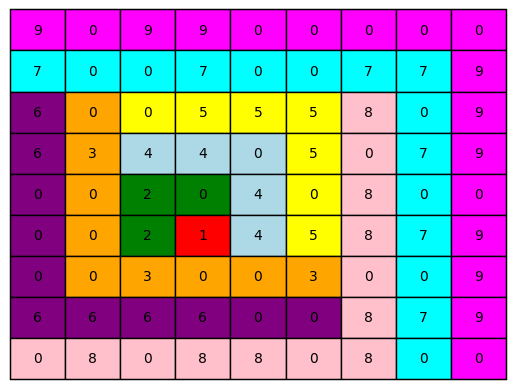

~~~~~~~~~~~


In [9]:
color_dict = {
    1: 'Red',
    2: 'Green',
    3: 'LightBlue',
    4: 'Yellow',
    5: 'Orange',
    6: 'Purple',
    7: 'Pink',
    8: 'Cyan',
    9: 'Magenta'
}


def prettyPrintColor(matrix, layout):

    '''
    for row in range(9):
        for col in range(9):
            if matrix[row][col] == -1:
                matrix[row][col] = 0
    '''

    
    data = np.array(matrix)
    
    # Get dimensions of the matrix
    ny, nx = data.shape
    
    # Create figure and table
    plt.figure()
    tb = plt.table(cellText=data, loc=(0, 0), cellLoc='center')
    
    # Adjust cell sizes based on matrix dimensions
    for i in range(ny):
        for j in range(nx):
            cell = tb._cells[(i, j)]
 
            cell.set_height(1 / ny)
            cell.set_width(1 / nx)


            
            cell.set_facecolor(color_dict[layout[i][j]])
    # Hide axes ticks
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()


def fillZeros(mat):
    for row in range(9):
        for col in range(9):
            if mat[row][col] == -1:
                mat[row][col] = 0
    return mat

#at this point i got lazy and just filled in the grid by hand
#also counted the area with 0's manually
count_ting = 0
#lay = permutation of number distribution in hooks

for mat,lay in last_possible_shits[:1]:
    mat[0][3] = 9
    mat[1][8] = 9
    mat[3][8] = 9
    mat[5][8] = 9
    mat[6][8] = 9
    mat[7][8] = 9
    mat[2][0] = 6
    mat[3][0] = 6
    mat[7][0] = 6
    mat[5][4] = 4

    mat = fillZeros(mat)
    
    
    
    print(count_ting)
    prettyPrintColor(mat,lay)
    count_ting += 1
    print("~~~~~~~~~~~")

In [10]:
#counted this by hand at 3-4am
res_ans = (5**2) * (2**3)* 7 * 6
print(res_ans)

8400
